### Build a decision tree algorithm for classification on a given data set.

[[ 9  0  0]
 [ 0 12  0]
 [ 0  2 15]]


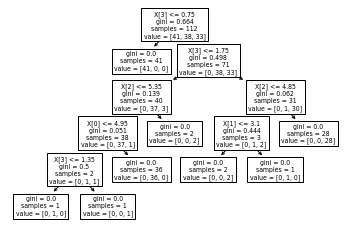

In [292]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

iris = load_iris()
features = iris.data
target = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(features, target)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
plot_tree(classifier)
print(confusion_matrix(Y_test, Y_pred))

### Implement naïve Bayesian classifier and Compute its accuracy on test data set.

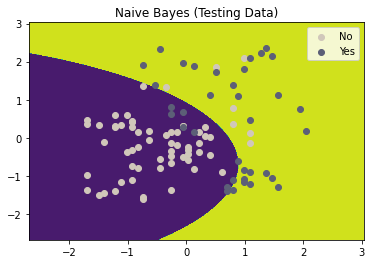

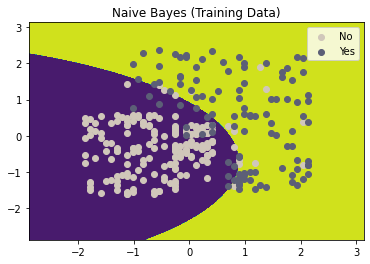

In [392]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

dataset = read_csv("../datasets/Social_Network_Ads.csv")
features = dataset[["Age", "EstimatedSalary"]]
target = dataset["Purchased"]
features = StandardScaler().fit_transform(features)
X_train, X_test, Y_train, Y_test = train_test_split(features, target)

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
confusion_matrix(Y_test, Y_pred)


def plot(X_set, Y_set, classifier, title):
    X, Y = np.meshgrid(
        np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, step=0.01),
        np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, step=0.01),
    )
    plt.contourf(
        X, Y, classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
    )
    for i, j in enumerate(np.unique(Y_set)):
        plt.scatter(
            X_set[Y_set == j, 0],
            X_set[Y_set == j, 1],
            c=[ListedColormap(("#d0c7ba", "#5c5f77"))(i)],
            label=["No","Yes"][j],
        )
        plt.title(title)
        plt.legend()
    plt.show()


plot(X_test, Y_test, classifier, "Naive Bayes (Testing Data)")

plot(X_train, Y_train, classifier, "Naive Bayes (Training Data)")